___
# MINIPROJETO 1

## <font color='red'>Cauê Citrini Lacava</font>
___

## <font color='blue'>NOME DA VARIÁVEL QUANTITATIVA ESCOLHIDA</font>

___
### Itens 1 a 3 - Resolução:

In [53]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
import itertools

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/CaueCitrini/Downloads


In [54]:
tornadoes = pd.read_csv("tornadoes_96_2013.csv")
latitude_ini = tornadoes['Starting Latitude']

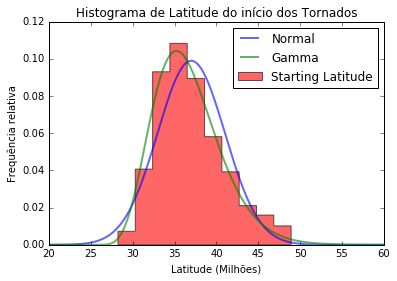

In [131]:
#Plotar Normal
media = latitude_ini.mean()

variancia = latitude_ini.std()

x=np.linspace(20,60,300)
plt.plot(x, stats.norm.pdf(x, loc=media, scale=variancia), lw=2, alpha=0.6, label="Normal")

#Plotar Gamma
k_gamma = 100

theta_gamma = media/k_gamma

f = np.linspace(20, 60, 1000)

gamma = stats.gamma.pdf(f, scale=1.4, loc=25, a=8.3)
plt.plot(f, gamma, lw=2, alpha=0.6, label="Gamma")

#Plotar Starting Latitude
plot = latitude_ini.plot.hist(bins=10, normed=True, histtype='stepfilled', alpha=0.6)
plt.title("Histograma de Latitude do início dos Tornados")
plt.xlabel("Latitude (Milhões)")
plt.ylabel("Frequência relativa")
plt.legend()

In [130]:
stats.gamma.fit(latitude_ini)

(8.3329310715248894, 25.361341274607494, 1.3948472194030281)

___
### Itens 4 a 6 - Resolução:

___
### Itens 7 a 9 - Resolução:

___
### Itens 10 e 11 - Resolução: